In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
from model_helper import get_evaluation_set_175, get_evaluation_set_6, QUERY, DOCUMENT, two_gram_overlap, get_evaluation_set
import nltk
import heapq
import tqdm
import matplotlib.pyplot as plt

df = get_evaluation_set()
total_rows = df.shape[0]
print(df.shape)
df.head()

(4000, 5)


,book_text,depth_3_summary,model_size,book_num,document_index
0,"THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...","Uncle Pros, uncle of the sick woman and mainst...",6b,0,0
1,selfish--said she'd like to know how I was goi...,The nurse says the baby is a likely little gir...,6b,0,1
2,"rich, broken light from the cavernous fireplac...",Uncle Pros takes the cradle to the back door t...,6b,0,2
3,"\n""Well, you go ask Pap to look in the green c...",Mrs. Bence tells Laurelly to ask Pap to look i...,6b,0,3
4,"she wants--ain't ye, Pretty?""\n\nAnd, having m...",Uncle Pros lifts the baby into the cradle and ...,6b,0,4


In [3]:
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation for k=1 to 10...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")


Starting recall@k calculation for k=1 to 10...


Recall@k: 100%|██████████| 4000/4000 [05:07<00:00, 12.99row/s]

Recall at k = 1: 0.9952
Recall at k = 2: 0.9958
Recall at k = 3: 0.9958
Recall at k = 4: 0.9960
Recall at k = 5: 0.9960
Recall at k = 6: 0.9960
Recall at k = 7: 0.9960
Recall at k = 8: 0.9960
Recall at k = 9: 0.9960
Recall at k = 10: 0.9962
Calculation completed.


In [4]:
df = get_evaluation_set_6()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 6B...")
# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 6B...


Recall@k: 100%|██████████| 4108/4108 [06:18<00:00, 10.85row/s]

Recall at k = 1: 0.9954
Recall at k = 2: 0.9959
Recall at k = 3: 0.9959
Recall at k = 4: 0.9961
Recall at k = 5: 0.9961
Recall at k = 6: 0.9961
Recall at k = 7: 0.9961
Recall at k = 8: 0.9961
Recall at k = 9: 0.9961
Recall at k = 10: 0.9963
Calculation completed.


In [5]:
df = get_evaluation_set_175()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 175B...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 175B...


Recall@k: 100%|██████████| 4108/4108 [05:05<00:00, 13.46row/s]

Recall at k = 1: 0.8225
Recall at k = 2: 0.8678
Recall at k = 3: 0.8841
Recall at k = 4: 0.8965
Recall at k = 5: 0.9043
Recall at k = 6: 0.9102
Recall at k = 7: 0.9153
Recall at k = 8: 0.9214
Recall at k = 9: 0.9245
Recall at k = 10: 0.9267
Calculation completed.


Retrieval vs. Ngram Score @10:  97%|█████████▋| 4000/4108 [04:42<00:07, 14.17row/s]


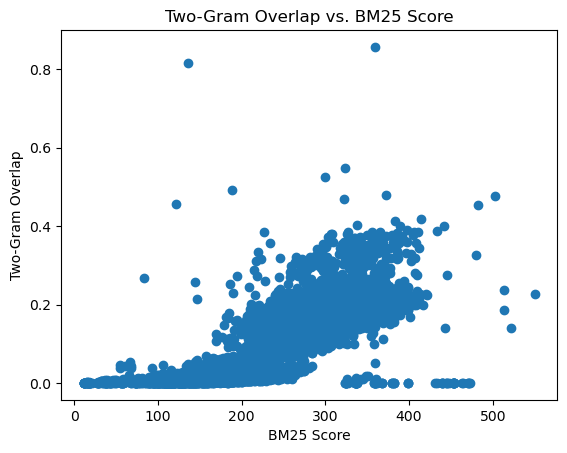

In [6]:
df = get_evaluation_set()
tokenized_corpus = [doc.split(" ") for doc in df[DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

# Simulated BM25 scores and two-gram overlap calculation
bm25_scores = []
two_gram_overlaps = []

for k in range(10, 11): 
    
    pbar = tqdm.tqdm(total=total_rows, desc=f'Retrieval vs. Ngram Score @{k}', unit='row')

    for index, row in df.iterrows():
        query, document = row[QUERY].split(" "), row[DOCUMENT]
        # Simulate BM25 scoring
        doc_scores = bm25.get_scores(query)  # Replace with actual BM25 scoring
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        
        # Calculate two-gram overlap for top-k documents
        for i in top_k_indexes:
            overlap = two_gram_overlap(row[QUERY], df[DOCUMENT][i])
            bm25_scores.append(doc_scores[i]) 
            two_gram_overlaps.append(overlap)
            
        # Update progress bar
        pbar.update(1)
    
    # Close the progress bar upon completion
    pbar.close()
            
    # Plotting
    plt.scatter(bm25_scores, two_gram_overlaps)
    plt.xlabel('BM25 Score')
    plt.ylabel('Two-Gram Overlap')
    plt.title('Two-Gram Overlap vs. BM25 Score')
    plt.show()